In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('DAT-NYC-28/data/yelp.csv')

In [3]:
df.columns

Index([u'business_id', u'date', u'review_id', u'stars', u'text', u'type',
       u'user_id', u'cool', u'useful', u'funny'],
      dtype='object')

In [4]:
df[['funny','useful','stars']].head()

,funny,useful,stars
0,0,5,5
1,0,0,5
2,0,1,4
3,0,2,5
4,0,0,5


In [5]:
df[['funny','useful','stars']].describe()

,funny,useful,stars
count,10000.000000,10000.000000,10000.000000
mean,0.701300,1.409300,3.777500
std,1.907942,2.336647,1.214636
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,3.000000
50%,0.000000,1.000000,4.000000
75%,1.000000,2.000000,5.000000
max,57.000000,76.000000,5.000000


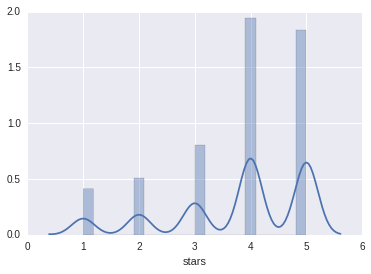

In [6]:

import seaborn as sns
%matplotlib inline
sns.distplot(df.stars)

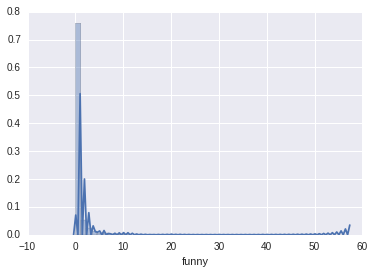

In [7]:
sns.distplot(df.funny)

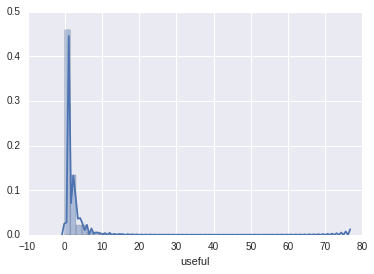

In [8]:
sns.distplot(df.useful)

In [9]:
X = df.loc[:,['funny','useful']]
y = df.loc[:,['stars']]

In [14]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [15]:
clf.fit(X,y)

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:449: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [16]:
clf.score(X,y)

0.35289999999999999

In [17]:
import cPickle as pickle
pickle.dump(clf,open('clf.pkl','wb'))

In [ ]:
df['label'] = np.where(df.stars >= 4,1,0)